In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
import math

/Users/Andrew-MB/DEV/08.PYTHON/01.WORKSPACE/slowcampus0202/env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/Andrew-MB/DEV/08.PYTHON/01.WORKSPACE/slowcampus0202/env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# y = w * x + b 함수
def myfunc(x):
  y = math.cos(x) + math.sin(x) * math.sin(x)
  noise = random.random() * 0.1 # Noise
  return y + y*noise

In [3]:
# random.random() -- 0.0 ~ 1.0
NUM_DATA = 60          # 데이터 갯수
XVALUE = 5              # X값의 범위 (0.0 ~ 5.0)
# type: python list
xtrain = [random.random() * XVALUE for i in range(NUM_DATA)]
xtrain.sort()            # sorting

In [4]:
ytrain = [myfunc(x) for x in xtrain]
print('xtrain :',xtrain[:3])
print('ytrain :',ytrain[:3])

xtrain : [0.2125326573197983, 0.2795042046567586, 0.3786186721767454]
ytrain : [1.1020455388341417, 1.1026981265671068, 1.1551509671076454]


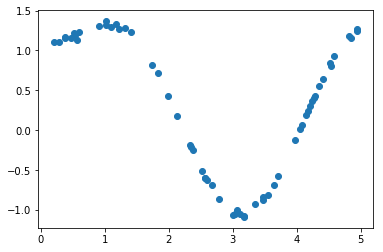

In [5]:
# actual data 산점도
fig, ax = plt.subplots()
ax.scatter(xtrain, ytrain, label='actual')
plt.show()

In [6]:
# type 변환 python list -> numpy ndarray
# type: numpy ndarray
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
print('xlist.shape :',xtrain.shape)  # shape ==  (10,)
print('ylist.shape :',ytrain.shape)  # shape ==  (10,)

xlist.shape : (60,)
ylist.shape : (60,)


In [7]:
# tensor 에 맞추기 위해 reshape
xtrain = xtrain.reshape((NUM_DATA, 1))  # shape ==  (10,1)
ytrain = ytrain.reshape((NUM_DATA, 1))  # shape ==  (10,1)
print('xlist.shape :', xtrain.shape)
print('ylist.shape :', ytrain.shape)

xlist.shape : (60, 1)
ylist.shape : (60, 1)


In [8]:
X = tf.placeholder(tf.float32, [None, 1])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([1,2], -1, 1), name='weight')
B = tf.Variable(tf.random_normal([2], -1, 1), name='bias')
H1 = tf.nn.sigmoid(tf.matmul(X, W) + B)

W1 = tf.Variable(tf.random_normal([2,2], -1, 1), name='weight1')
B1 = tf.Variable(tf.random_normal([2], -1, 1), name='bias1')
H2 = tf.nn.sigmoid(tf.matmul(H1, W1) + B1)   # [1,1]행렬 x [1,1]행렬 + [1]

W3 = tf.Variable(tf.random_normal([2,1], -1, 1), name='weight2')
B3 = tf.Variable(tf.random_normal([1], -1, 1), name='bias2')
Y2 = (tf.matmul(H2, W3) + B3)   # [1,1]행렬 x [1,1]행렬 + [1]



In [9]:
# 손실 함수
cost_function = tf.reduce_mean(tf.square(Y2 - Y))
# 옵티마이저
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
optimizer = tf.train.AdamOptimizer(learning_rate=0.2)
training = optimizer.minimize(cost_function)

In [10]:
# loss list
history = []           # Record loss values for plot

In [11]:
# Session 시작
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(5000):
  res, cost  = sess.run([training, cost_function],
                        feed_dict={X: xtrain, Y:ytrain})
  if i % 10 == 0:
    y2, w, b = sess.run([Y2, W, B], feed_dict={X: xtrain, Y: ytrain})
    #print('[%04d]' % i, 'LOSS', cost, 'W', w, 'bias', b)
    print('[%04d]' % i, 'LOSS', cost)

    history.append(cost)

[0000] LOSS 1.7755481
[0010] LOSS 0.6815713
[0020] LOSS 0.5958618
[0030] LOSS 0.5004513
[0040] LOSS 0.4138694
[0050] LOSS 0.39211
[0060] LOSS 0.39043576
[0070] LOSS 0.38404936
[0080] LOSS 0.38225123
[0090] LOSS 0.38085595
[0100] LOSS 0.3796414
[0110] LOSS 0.3787883
[0120] LOSS 0.37797606
[0130] LOSS 0.3772476
[0140] LOSS 0.37648466
[0150] LOSS 0.3754926
[0160] LOSS 0.3732529
[0170] LOSS 0.35467306
[0180] LOSS 0.27785033
[0190] LOSS 0.12613471
[0200] LOSS 0.046014905
[0210] LOSS 0.021895539
[0220] LOSS 0.0117076235
[0230] LOSS 0.006651024
[0240] LOSS 0.006263121
[0250] LOSS 0.0059280503
[0260] LOSS 0.006075121
[0270] LOSS 0.00571149
[0280] LOSS 0.0054710438
[0290] LOSS 0.005378668
[0300] LOSS 0.0053067566
[0310] LOSS 0.0052323258
[0320] LOSS 0.005171166
[0330] LOSS 0.0056539862
[0340] LOSS 0.007898396
[0350] LOSS 0.0064409375
[0360] LOSS 0.0054684835
[0370] LOSS 0.005141725
[0380] LOSS 0.0050540636
[0390] LOSS 0.0049378383
[0400] LOSS 0.00491366
[0410] LOSS 0.004885934
[0420] LOSS 0.004

[3600] LOSS 0.005109349
[3610] LOSS 0.0034407761
[3620] LOSS 0.0036360458
[3630] LOSS 0.004272051
[3640] LOSS 0.0033765037
[3650] LOSS 0.003302187
[3660] LOSS 0.0032952542
[3670] LOSS 0.0032693474
[3680] LOSS 0.0032685434
[3690] LOSS 0.0032557552
[3700] LOSS 0.0032640218
[3710] LOSS 0.0036657813
[3720] LOSS 0.011064869
[3730] LOSS 0.007816637
[3740] LOSS 0.0033303148
[3750] LOSS 0.0035760216
[3760] LOSS 0.0034355104
[3770] LOSS 0.0032933324
[3780] LOSS 0.0032574772
[3790] LOSS 0.003229548
[3800] LOSS 0.0032151425
[3810] LOSS 0.0032052337
[3820] LOSS 0.0032120124
[3830] LOSS 0.0041127945
[3840] LOSS 0.0057766493
[3850] LOSS 0.0034959076
[3860] LOSS 0.004313304
[3870] LOSS 0.0032698752
[3880] LOSS 0.0033637334
[3890] LOSS 0.0032086456
[3900] LOSS 0.0031823418
[3910] LOSS 0.0031764987
[3920] LOSS 0.00317401
[3930] LOSS 0.003163985
[3940] LOSS 0.0031622204
[3950] LOSS 0.0032020768
[3960] LOSS 0.0055759726
[3970] LOSS 0.0033942608
[3980] LOSS 0.0042276555
[3990] LOSS 0.0040221172
[4000] LOS

In [12]:
## loss 값의 변화 그래프

No handles with labels found to put in legend.


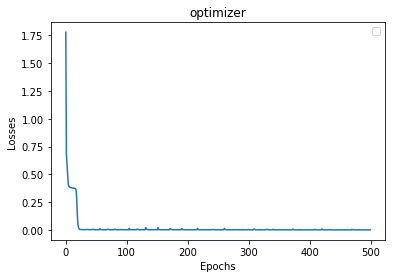

In [13]:
# Plot the accuracy and cost summaries
f, ax = plt.subplots()

ax.plot(history)    # GradientDescentOptimizer
ax.set_title('optimizer')

plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()

## 학습 데이터에 대한 정확도 확인 (학습 오차 확인)

In [14]:
y_from_nn = sess.run([Y2], feed_dict={X: xtrain})

for y_nn, y_real in zip(y_from_nn[0], ytrain):
    err = abs(y_nn[0] - y_real) / y_real * 100
    print('%.2f  %.2f 오차율 %.2f %%' % (y_nn[0], y_real, err))
    

1.23  1.10 오차율 11.79 %
1.23  1.10 오차율 11.72 %
1.23  1.16 오차율 6.64 %
1.23  1.17 오차율 5.57 %
1.23  1.16 오차율 6.37 %
1.23  1.22 오차율 0.60 %
1.23  1.19 오차율 3.59 %
1.23  1.14 오차율 8.47 %
1.23  1.23 오차율 0.16 %
1.23  1.30 오차율 5.67 %
1.22  1.31 오차율 6.76 %
1.22  1.36 오차율 10.29 %
1.22  1.30 오차율 5.94 %
1.21  1.33 오차율 8.95 %
1.21  1.27 오차율 4.85 %
1.19  1.28 오차율 7.19 %
1.16  1.24 오차율 6.10 %
0.90  0.81 오차율 10.44 %
0.76  0.72 오차율 5.22 %
0.49  0.43 오차율 15.34 %
0.20  0.18 오차율 12.85 %
-0.21  -0.19 오차율 -8.79 %
-0.24  -0.21 오차율 -14.66 %
-0.29  -0.25 오차율 -13.28 %
-0.53  -0.51 오차율 -4.06 %
-0.60  -0.60 오차율 -0.06 %
-0.60  -0.60 오차율 -0.03 %
-0.65  -0.63 오차율 -3.51 %
-0.73  -0.69 오차율 -6.10 %
-0.85  -0.86 오차율 -1.36 %
-0.99  -1.07 오차율 -6.95 %
-1.01  -1.05 오차율 -4.33 %
-1.01  -1.00 오차율 -1.34 %
-1.02  -1.05 오차율 -3.19 %
-1.02  -1.08 오차율 -5.34 %
-1.02  -1.09 오차율 -6.23 %
-0.97  -0.93 오차율 -3.80 %
-0.89  -0.88 오차율 -1.68 %
-0.88  -0.84 오차율 -5.18 %
-0.81  -0.81 오차율 -0.19 %
-0.69  -0.69 오차율 -0.27 %
-0.61  -0.57 오차율 -5.93 %
-0.13

## 테스트 데이터로 해보기

In [15]:
x_unseen = [random.random() * XVALUE for i in range(NUM_DATA)]
x_unseen = np.array(x_unseen).reshape((NUM_DATA, 1))

y_unseen = sess.run([Y2], feed_dict={X: x_unseen})

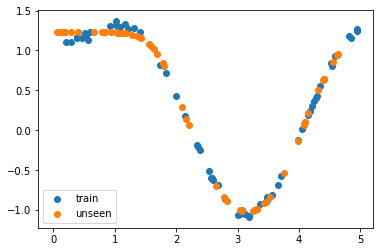

In [16]:
fig, ax = plt.subplots()
ax.scatter(xtrain, ytrain, label='train')
ax.scatter(x_unseen, y_unseen, label='unseen')

ax.legend()
plt.show()